In [5]:
# ! pip install lazypredict

### **1. Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### **2. Import Dataset**

In [2]:
df = pd.read_csv('SARS-Cov_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [4]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
98,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
100,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 3. Data pre-processing

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(102, 168)

In [6]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
Y_test

30    5.50
67    6.66
62    7.52
47    5.59
42    5.95
40    6.13
90    7.70
45    5.45
10    5.34
0     6.41
18    6.27
31    5.50
97    5.36
85    5.88
76    6.24
4     7.40
79    5.68
33    6.82
12    6.85
26    5.69
100   6.12
Name: pIC50, dtype: float64

### 4. Compare ML algorithms

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:39<00:00,  1.07it/s]


In [9]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,62046683509601839423719033939037695788005718431...,-4591454579710535703250427704054962242227071427...,4808139284635839050540952025512712949727232.00,0.12
LinearRegression,54986063413318352896.00,-406896869258555817984.00,14313441519.99,0.02
TransformedTargetRegressor,54986063413318352896.00,-406896869258555817984.00,14313441519.99,0.02
KernelRidge,11.29,-75.13,6.19,0.02
GaussianProcessRegressor,10.76,-71.20,6.03,0.02
LinearSVR,1.41,-2.03,1.24,0.05
MLPRegressor,1.31,-1.29,1.07,0.30
OrthogonalMatchingPursuit,1.27,-1.03,1.01,0.02
HuberRegressor,1.21,-0.57,0.89,0.13


In [13]:
# Performance table of the training set (80% subset)
#predictions

## **5. Data visualization of model performance**

[(0.0, 1.0)]

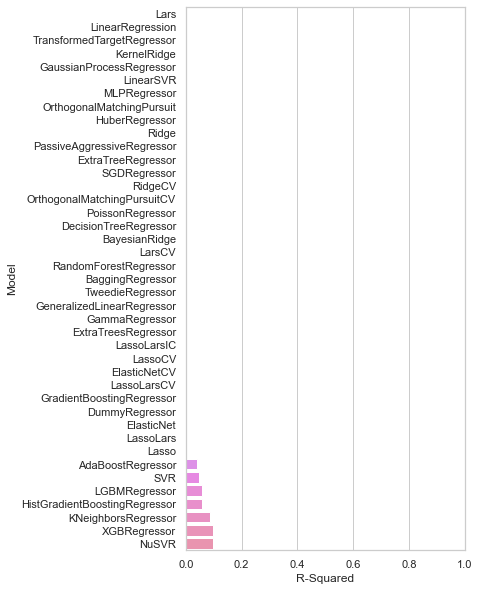

In [10]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

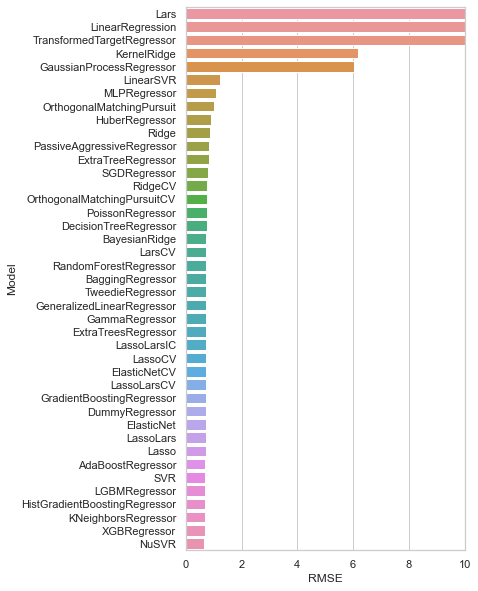

In [11]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="RMSE", data=predictions)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

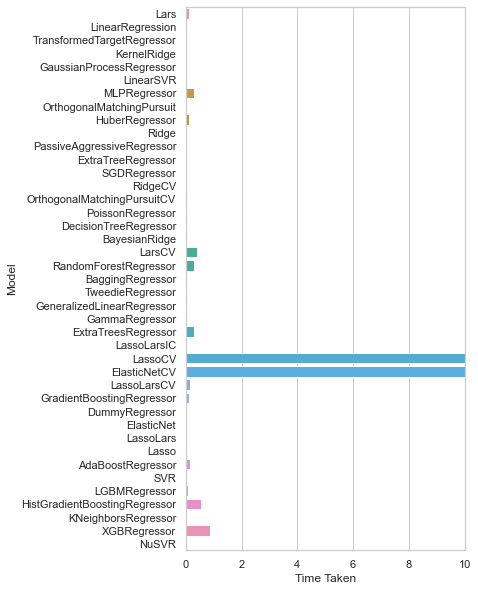

In [12]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Time Taken", data=predictions)
ax.set(xlim=(0, 10))